# データ分析で頻出のPandas基本操作

機械学習や深層学習が人気の昨今ですが、それらのモデルの精度に最もクリティカルに影響するのはインプットする**データの質**です。データの質は、データを適切に把握し、不要なデータを取り除いたり、必要なデータを精査する**前処理**を行うことで担保することが出来ます。 

本頁では、データ処理の基本ツールとしてPandasの使い方を紹介します。Pandasには便利な機能がたくさんありますが、特に分析業務で**頻出の**Pandas関数・メソッドを重点的に取り上げました。

また、単に機能を説明するだけでは実際の処理動作がわかりにくいため、ここではSIGNATE(旧DeepAnalytics)の[お弁当の需要予想を行うコンペのデータ](https://signate.jp/competitions/24)を拝借し、このデータに対して一貫してPandasの処理を適応していくことで、一連のPandas操作（前処理のプロセス）を体験してもらいます。

In [1]:
# python 実行用
import sys
print(sys.executable)

/Users/kshimada/train/Jupyter/bin/python


![pandas](./figs/pandas.jpg)

## Pandasについて
- 公式ドキュメント：http://pandas.pydata.org/pandas-docs/stable/
- pandasは、Pythonにおいて、データ解析を支援する機能を提供するライブラリである。特に、数表および時系列データを操作するためのデータ構造と演算を提供する。
- pandasの特長
    - データ操作のための高速で効率的なデータフレーム (DataFrame) オブジェクト
    - メモリ内のデータ構造とその他のフォーマットのデータ間で相互に読み書きするためのツール群。フォーマット例: CSV、テキストファイル、Excel、SQLデータベース、HDF5フォーマットなど
    - かしこいデータのアライメントおよび統合された欠損値処理
    - データセットの柔軟な変形およびピボット
    - ラベルに基づいたスライス、fancyインデクシング、巨大なデータセットのサブセット取得
    - データセットに対するsplit-apply-combine操作を可能にするエンジンが提供するpowerful groupを使ったデータの集計および変換
    - 高性能なデータセットのマージと結合
    - 時系列データ: 日付範囲生成、周波数変換、移動窓を用いた統計値や線形回帰、シフトと遅延、など
    - パフォーマンスのための高度な最適化。重要なコードはCythonまたはC言語で実装されている。

## 本頁で紹介するPandasメソッド一覧

**① Pythonのバージョン確認、モジュールのimport、データの読み込み**
- pd.read_csv()
- df.head()
- df.tail()

**② 簡単にデータの状態を確認する（行数列数カウント・データの選択的表示・重複の有無など）**
- df.shape()
- df.index
- df.columns
- df.dtypes
- df.loc[]
- df.iloc[]
- df.query()
- df.unique()
- df.drop_duplicates()
- df.describe()

**③ データの整形（データ型変更、列名変更、並び替えなど）**
- df.set_index()
- df.rename()
- df.sort_values()
- df.to_datetime()
- df.sort_index()
- df.resample()
- df.apply()
- pd.cut()

**④ データの欠損状態の確認** 
- df.isnull()
- df.any()

**⑤ 値（欠損）の置き換えや削除**
- df.fillna()
- df.dropna()
- df.replace()
- df.mask()
- df.drop()

**⑥ 集計**
- df.value_counts()
- df.groupby()
- df.diff()
- df.rolling()
- df.pct_change()

**⑦ 可視化**
- df.plot()
- df.corr()
- df.pivot()

**⑧ 変数の前処理**
- pd.get_dummies()

**⑨ 最後に、出来たデータをもう一度眺める**
- df.to_csv()

## ① Pythonのバージョン確認、モジュールのimport、データの読み込み

まずはpandasと今回使うデータのimportを行い表示してみます。

In [1]:
# pythonのバージョン確認
!python -V

Python 3.12.4


In [15]:
# 一般的にpandasはpdと名前を付けてimportされる
import pandas as pd
import os
print(os.getcwd())  # カレントディレクトリを表示

/Users/kshimada/train/pd_tr


In [16]:

# read_csvメソッドでお弁当需要予想に関するデータをcsvファイルとして読み込む
df = pd.read_csv('./lunch_box.csv', sep=',')

In [18]:
# データの確認をする（最初の3行を表示）
df.head(3)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5


### 各列の説明
データ詳細ページ: https://signate.jp/competitions/24/data

|No.|列名|内容|説明|
|:---|:---|:---|:---|
|1|datetime|日付|インデックスとして使用|
|2|y|販売数|目的変数|
|3|week|曜日|月～金|
|4|soldout|完売フラグ|0:完売せず、1:完売|
|5|name|メインメニュー|マルチバイト文字列（日本語）|
|6|kcal|カロリー（kcal）|整数。存在しないレコードあり|
|7|remarks|特記事項|自由記述|
|8|event|13時開始お弁当持ち込み可イベント|社内イベントの有無。存在しないレコードあり|
|9|payday|給料日フラグ|1:給料日|
|10|weather|天気|マルチバイト文字列（日本語）|
|11|precipitation|降水量|実数。降水量 0 は "--" と表記|
|12|temperature|気温|実数|

![dataframe](./figs/dataframe.png)

In [21]:
# 先頭の5行を表示
df.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [20]:
# 最後尾の5行を表示
df.tail()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4
204,2014-9-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,晴れ,--,27.1
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6
206,2014-9-30,40,火,0,鶏肉とカシューナッツ炒め,398.0,NaN,NaN,NaN,快晴,--,28.1


## ② 簡単にデータの状態を確認する（行数列数カウント・データの選択的表示・重複の有無など）
読み込んだデータがどんなものなのか、簡単に概要を掴むための操作を行います。

In [7]:
print('dataframeの行数・列数の確認==>\n', df.shape)
print('indexの確認==>\n', df.index)
print('columnの確認==>\n', df.columns)
print('dataframeの各列のデータ型を確認==>\n', df.dtypes)

dataframeの行数・列数の確認==>
 (207, 12)
indexの確認==>
 RangeIndex(start=0, stop=207, step=1)
columnの確認==>
 Index(['datetime', 'y', 'week', 'soldout', 'name', 'kcal', 'remarks', 'event',
       'payday', 'weather', 'precipitation', 'temperature'],
      dtype='object')
dataframeの各列のデータ型を確認==>
 datetime          object
y                  int64
week              object
soldout            int64
name              object
kcal             float64
remarks           object
event             object
payday           float64
weather           object
precipitation     object
temperature      float64
dtype: object


In [23]:
# 任意の列だけ取り出したい場合
df[['name', 'kcal']].head()

,name,kcal
0,厚切りイカフライ,NaN
1,手作りヒレカツ,NaN
2,白身魚唐揚げ野菜あん,NaN
3,若鶏ピリ辛焼,NaN
4,ビッグメンチカツ,NaN


In [24]:
# 100行目から105行目まで表示したい場合
df[100:106]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
100,2014-4-22,78,火,1,マーボ豆腐,382.0,NaN,NaN,NaN,曇,--,18.8
101,2014-4-23,63,水,0,手作りひれかつ,340.0,NaN,NaN,NaN,快晴,--,19.4
102,2014-4-24,56,木,1,鶏の照り焼きマヨ,360.0,NaN,NaN,NaN,晴れ,--,19.9
103,2014-4-25,80,金,0,中華丼,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,20.8
104,2014-4-28,54,月,0,タンドリーチキン,342.0,NaN,NaN,NaN,晴れ,--,22.7
105,2014-4-30,97,水,1,豚味噌メンチカツ,368.0,NaN,NaN,NaN,雨,0.5,17.5


In [25]:
# indexが100の行だけ取得したい場合
df.loc[100]

datetime         2014-4-22
y                       78
week                     火
soldout                  1
name                 マーボ豆腐
kcal                 382.0
remarks                NaN
event                  NaN
payday                 NaN
weather                  曇
precipitation           --
temperature           18.8
Name: 100, dtype: object

In [26]:
# もっとピンポイントに抽出したい場合
# 例: 1,2,4 行目と 0-2 列目を取得
df.iloc[[1,2,4],[0,2]]

,datetime,week
1,2013-11-19,火
2,2013-11-20,水
4,2013-11-22,金


In [12]:
# 条件を指定して抽出
df[df['kcal'] > 450]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
29,2014-1-8,128,水,0,豚肉の生姜焼,462.0,NaN,NaN,NaN,曇,--,9.8
45,2014-1-31,92,金,1,メダイ照り焼,460.0,NaN,NaN,NaN,快晴,--,14.1
193,2014-9-9,63,火,0,ハンバーグデミソース,460.0,NaN,NaN,NaN,晴れ,--,26.8


In [13]:
# queryメソッドを使うと、複数条件の指定で、特定カラムだけ出力もできる
df[['name', 'kcal']].query('kcal > 450 and name == "豚肉の生姜焼"') #query内のシングル/ダブルクオーテーションの使い方に注意

,name,kcal
29,豚肉の生姜焼,462.0


In [14]:
# 'remarks(備考)'には例えばどんなデータが入っているか確認
df['remarks'].unique()

array([nan, '鶏のレモンペッパー焼（50食）、カレー（42食）', '酢豚（28食）、カレー（85食）', 'お楽しみメニュー',
       '料理長のこだわりメニュー', '手作りの味', 'スペシャルメニュー（800円）'], dtype=object)

In [15]:
# datatime単位で重複したデータが存在しないか確認
print(len(df) == len(df['datetime'].unique()))

True


In [16]:
#行方向で重複行を削除
df.drop_duplicates() 
print(df.shape) # 重複が存在しないので数は変わらないはず

(207, 12)


In [17]:
# 要約統計量の表示
df.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


## ③ データの整形（データ型変更、列名変更、並び替えなど）
なんとなくのデータの雰囲気はわかったので、次は自分が操作しやすいように列名を変更したり、処理しやすいようにデータ型を変更したりしてみます。

In [18]:
# datetime列をindexにする
df.set_index('datetime', inplace=True)
df.head()

,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [19]:
df.index

Index(['2013-11-18', '2013-11-19', '2013-11-20', '2013-11-21', '2013-11-22',
       '2013-11-25', '2013-11-26', '2013-11-27', '2013-11-28', '2013-11-29',
       ...
       '2014-9-16', '2014-9-17', '2014-9-18', '2014-9-19', '2014-9-22',
       '2014-9-24', '2014-9-25', '2014-9-26', '2014-9-29', '2014-9-30'],
      dtype='object', name='datetime', length=207)

In [20]:
# カラム名を変更する（y を sales に変換）
df.rename(columns={'y': 'sales'}, inplace=True)
df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [65]:
# 'sales'列を降順で並び替えもできる
df.sort_values(by="sales", ascending=True).head() # ascending=Trueで昇順

,sales,week,soldout,name,kcal,event,payday,weather,precipitation,temperature,month,day,period,temperature_diff,temperature_rolling_mean,temperature_pct_change
datetime,,,,,,,,,,,,,,,,
2014-09-22,29,月,0,筑前煮,395.0,NaN,0.0,晴れ,0.0,25.2,9,22,下旬,1.6,24.300000,0.067797
2014-08-01,38,金,0,豚肉の生姜焼き,380.0,NaN,0.0,薄曇,0.0,32.7,8,1,上旬,0.2,31.933333,0.006154
2014-08-29,39,金,0,チキンの辛味噌焼き,398.0,NaN,0.0,曇,0.0,25.1,8,29,下旬,3.5,22.566667,0.162037
2014-08-12,40,火,1,厚切ハムカツ,400.0,NaN,0.0,雨,0.0,29.4,8,12,中旬,-3.0,31.300000,-0.092593
2014-09-30,40,火,0,鶏肉とカシューナッツ炒め,398.0,NaN,0.0,快晴,0.0,28.1,9,30,下旬,1.5,26.700000,0.056391
2014-09-05,43,金,0,メンチカツ,380.0,NaN,0.0,晴れ,0.0,30.2,9,5,上旬,3.7,27.800000,0.139623
2014-08-11,45,月,0,サーモンフライ・タルタル,411.0,NaN,0.0,晴れ,0.0,32.4,8,11,中旬,0.3,33.033333,0.009346
2014-09-19,45,金,0,厚切イカフライ,400.0,NaN,0.0,薄曇,0.0,23.6,9,19,中旬,-0.5,24.233333,-0.020747
2014-09-18,46,木,0,カレイ唐揚げ 甘酢あん,395.0,NaN,0.0,曇,0.0,24.1,9,18,中旬,-0.9,25.966667,-0.036000


In [66]:
# sort_valuesは複数の列に対しても実行できる
df.sort_values(['sales', 'temperature'], ascending=False).head() # ascending=Falseで昇順

,sales,week,soldout,name,kcal,event,payday,weather,precipitation,temperature,month,day,period,temperature_diff,temperature_rolling_mean,temperature_pct_change
datetime,,,,,,,,,,,,,,,,
2014-02-03,139,月,1,ハンバーグカレーソース,445.0,NaN,0.0,晴れ,0.0,15.9,2,3,上旬,1.8,15.100000,0.127660
2014-02-17,137,月,1,チンジャオロース,416.0,NaN,0.0,晴れ,0.0,11.6,2,17,中旬,10.4,6.400000,8.666667
2014-02-10,137,月,0,鶏の唐揚げおろしソース,423.0,NaN,1.0,曇,0.0,7.8,2,10,上旬,2.3,5.833333,0.418182
2014-01-15,134,水,0,さんま辛味焼,450.0,NaN,0.0,曇,0.0,2.9,1,15,中旬,-2.9,4.600000,-0.500000
2014-03-03,131,月,0,ハンバーグカレーソース,407.0,NaN,0.0,曇,0.0,7.8,3,3,上旬,-9.9,11.333333,-0.559322
2014-03-17,129,月,0,鶏の唐揚げおろしソース,382.0,NaN,0.0,快晴,0.0,14.0,3,17,中旬,2.5,13.566667,0.217391
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,0.0,曇,0.0,10.9,1,9,上旬,1.1,9.333333,0.112245
2014-01-21,129,火,1,サバ焼味噌掛け,447.0,NaN,0.0,快晴,0.0,10.4,1,21,下旬,3.9,8.233333,0.600000
2014-02-24,129,月,1,ポークハヤシ,408.0,NaN,0.0,曇,0.0,6.6,2,24,下旬,-1.9,6.833333,-0.223529


In [23]:
# indexのデータ型を確認してみる
df.index #  dtype='object'であることがわかる

Index(['2013-11-18', '2013-11-19', '2013-11-20', '2013-11-21', '2013-11-22',
       '2013-11-25', '2013-11-26', '2013-11-27', '2013-11-28', '2013-11-29',
       ...
       '2014-9-16', '2014-9-17', '2014-9-18', '2014-9-19', '2014-9-22',
       '2014-9-24', '2014-9-25', '2014-9-26', '2014-9-29', '2014-9-30'],
      dtype='object', name='datetime', length=207)

In [24]:
# indexであるdatetimeのdtype='object' を dtype='datetime64[ns]' に変更
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

In [25]:
df.index # dtype='datetime64[ns]'になった

DatetimeIndex(['2013-11-18', '2013-11-19', '2013-11-20', '2013-11-21',
               '2013-11-22', '2013-11-25', '2013-11-26', '2013-11-27',
               '2013-11-28', '2013-11-29',
               ...
               '2014-09-16', '2014-09-17', '2014-09-18', '2014-09-19',
               '2014-09-22', '2014-09-24', '2014-09-25', '2014-09-26',
               '2014-09-29', '2014-09-30'],
              dtype='datetime64[ns]', name='datetime', length=207, freq=None)

### indexがdatetime型のときにできること

In [67]:
# indexに対してsortを行う
df.sort_index().head() # object型のままだと正しくsortされない

,sales,week,soldout,name,kcal,event,payday,weather,precipitation,temperature,month,day,period,temperature_diff,temperature_rolling_mean,temperature_pct_change
datetime,,,,,,,,,,,,,,,,
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,0.0,曇,0.0,10.9,1,9,上旬,1.1,9.333333,0.112245
2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,1.0,快晴,0.0,5.1,1,10,上旬,-5.8,8.600000,-0.532110
2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,0.0,晴れ,0.0,5.8,1,14,中旬,0.7,7.266667,0.137255
2014-01-15,134,水,0,さんま辛味焼,450.0,NaN,0.0,曇,0.0,2.9,1,15,中旬,-2.9,4.600000,-0.500000
2014-01-16,107,木,0,カレイ唐揚げ野菜あんかけ,415.0,NaN,0.0,快晴,0.0,7.0,1,16,中旬,4.1,5.233333,1.413793


In [27]:
# resampleメソッドで、日単位や月単位で簡単に集計できる
df.resample('M').mean() #月単位で平均値を出力

,sales,soldout,kcal,payday,temperature
datetime,,,,,
2013-11-30,124.600000,0.500000,NaN,NaN,16.060000
2013-12-31,139.722222,0.444444,NaN,1.0,10.844444
2014-01-31,115.222222,0.611111,427.555556,1.0,8.716667
2014-02-28,107.842105,0.526316,420.947368,1.0,7.815789
2014-03-31,89.350000,0.450000,382.157895,1.0,12.505000
2014-04-30,85.761905,0.476190,360.000000,1.0,18.176190
2014-05-31,74.200000,0.550000,419.111111,1.0,22.505000
2014-06-30,67.285714,0.333333,423.315789,1.0,25.409524
2014-07-31,61.363636,0.454545,397.200000,1.0,29.350000


In [28]:
# 簡単にmonth列やday列を作れるようになる
df['month'] = list(pd.Series(df.index).apply(lambda x: x.month))
df['day'] = list(pd.Series(df.index).apply(lambda x: x.day))

df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day
datetime,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,11,18
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,11,19
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,11,20
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,11,21
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,11,22


In [29]:
# cutメソッドでヒストグラムのビン指定的な処理ができる
labels = ['上旬', '中旬', '下旬']
df['period'] = pd.cut(list(df['day']),  bins=[0,10,20,31], labels=labels, right=True) # 0<day≦10, 10<day≦20, 20<day≦31

df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,11,18,中旬
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,11,19,中旬
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,11,20,中旬
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,11,21,下旬
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,11,22,下旬


## ④ データの欠損状態の確認
データに欠損値NaN(not a number)があるともろもろ問題がでてきます。今のデータにどれくらい欠損があるかをまずはざっと確認します。

In [30]:
# 列単位で 欠損値NaN(not a number)が入っている個数をカウントする （正確には、isnull()でtureが返ってくる個数をカウントしている）
df.isnull().sum()

sales              0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
month              0
day                0
period             0
dtype: int64

In [31]:
# 1つでもNaNが含まれる行だけを抽出（最初の5行のみ表示）
print(df[df.isnull().any(axis=1)].shape)
df[df.isnull().any(axis=1)].head()

(207, 14)


,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,11,18,中旬
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,11,19,中旬
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,11,20,中旬
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,11,21,下旬
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,11,22,下旬


## ⑤ 値（欠損）の置き換えや削除
確認できた欠損値をなくすために欠損の削除や別の値への置き換えを行います。

In [32]:
# 'payday'列にあるNaNを'0.0'に置き換える
df.fillna(value={'payday': 0.0}, inplace=True)
df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,0.0,快晴,--,19.8,11,18,中旬
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,0.0,快晴,--,17.0,11,19,中旬
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,0.0,快晴,--,15.5,11,20,中旬
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,0.0,快晴,--,15.2,11,21,下旬
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,0.0,快晴,--,16.1,11,22,下旬


In [33]:
df.isnull().sum() # 'payday'が0になった

sales              0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday             0
weather            0
precipitation      0
temperature        0
month              0
day                0
period             0
dtype: int64

In [34]:
# 'kcal'列にNaNがある行を削除する
df.dropna(subset=['kcal'], axis=0, inplace=True)
print(df.shape) # 207-166=41行のデータを削除した

(166, 14)


In [35]:
df.isnull().sum() # kcal'がNaNがなくなって0になっていることがわかる

sales              0
week               0
soldout            0
name               0
kcal               0
remarks          158
event            155
payday             0
weather            0
precipitation      0
temperature        0
month              0
day                0
period             0
dtype: int64

In [36]:
# 'precipitation' 列の '--' を 0に置き換える
df['precipitation'] = df['precipitation'].replace('--', 0).astype(float)
df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2014-01-07,131,火,0,カレー入りソーセージカツ,404.0,NaN,NaN,0.0,快晴,0.0,7.3,1,7,上旬
2014-01-08,128,水,0,豚肉の生姜焼,462.0,NaN,NaN,0.0,曇,0.0,9.8,1,8,上旬
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,NaN,0.0,曇,0.0,10.9,1,9,上旬
2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,NaN,1.0,快晴,0.0,5.1,1,10,上旬
2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,NaN,0.0,晴れ,0.0,5.8,1,14,中旬


In [37]:
# maskメソッドを使う例。'sales'列が80よりも大きければ、その値を100に置換する
pd.DataFrame(df['sales'].mask(df['sales'] > 80, 100)).head()

,sales
datetime,
2014-01-07,100
2014-01-08,100
2014-01-09,100
2014-01-10,100
2014-01-14,100


In [38]:
# 'remarks(備考)'はデータとして不要な気がするので、データから列ごと削除
df.drop(['remarks'], axis=1, inplace=True)
df.head()

,sales,week,soldout,name,kcal,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,
2014-01-07,131,火,0,カレー入りソーセージカツ,404.0,NaN,0.0,快晴,0.0,7.3,1,7,上旬
2014-01-08,128,水,0,豚肉の生姜焼,462.0,NaN,0.0,曇,0.0,9.8,1,8,上旬
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,0.0,曇,0.0,10.9,1,9,上旬
2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,1.0,快晴,0.0,5.1,1,10,上旬
2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,0.0,晴れ,0.0,5.8,1,14,中旬


## ⑥ 集計
ここまででデータはある程度きれいになった気がするので簡単に集計をしてみます。

In [39]:
# weather列の集計
df['weather'].value_counts()

曇     44
晴れ    41
快晴    34
薄曇    23
雨     22
雷電     1
雪      1
Name: weather, dtype: int64

In [40]:
# groupbyメソッドで、'week'列ごとに'soldout'の数をカウントする
df.groupby(['week'])['soldout'].count()

week
月    34
木    37
水    37
火    35
金    23
Name: soldout, dtype: int64

In [41]:
# groupbyメソッドは複数列に対しても行える
# groupbyメソッドで、'month', 'period'列ごとに'sales'の数を合計する
df.groupby(['month', 'period'])['sales'].sum()

month  period
1      上旬         475
       中旬         581
       下旬        1018
2      上旬         725
       中旬         715
       下旬         609
3      上旬         614
       中旬         698
       下旬         369
4      上旬         792
       中旬         344
       下旬         457
5      上旬         316
       中旬         406
       下旬         517
6      上旬         467
       中旬         440
       下旬         311
7      上旬         460
       中旬         277
       下旬         406
8      上旬         288
       中旬         250
       下旬         334
9      上旬         468
       中旬         249
       下旬         234
Name: sales, dtype: int64

In [42]:
# wetherごとにtemperatureの平均値を出す
df.groupby(['weather'])['temperature'].mean()

weather
快晴    15.294118
晴れ    22.558537
曇     19.377273
薄曇    23.926087
雨     18.813636
雪      1.200000
雷電    19.000000
Name: temperature, dtype: float64

In [43]:
# 前行との差分が欲しい時は .diff() を使う
df['temperature_diff'] = df['temperature'].diff(periods=1)
df[['temperature','temperature_diff']].head()

,temperature,temperature_diff
datetime,,
2014-01-07,7.3,NaN
2014-01-08,9.8,2.5
2014-01-09,10.9,1.1
2014-01-10,5.1,-5.8
2014-01-14,5.8,0.7


In [44]:
# 'temperature'列について、頭からwindowサイズ3で移動平均を計算する
df['temperature_rolling_mean'] = df['temperature'].rolling(window=3).mean()
df[['temperature', 'temperature_diff', 'temperature_rolling_mean']].head()

,temperature,temperature_diff,temperature_rolling_mean
datetime,,,
2014-01-07,7.3,NaN,NaN
2014-01-08,9.8,2.5,NaN
2014-01-09,10.9,1.1,9.333333
2014-01-10,5.1,-5.8,8.600000
2014-01-14,5.8,0.7,7.266667


In [45]:
df['temperature_pct_change'] = df['temperature'].pct_change()
df[['temperature', 'temperature_diff', 'temperature_rolling_mean', 'temperature_pct_change']].head()

,temperature,temperature_diff,temperature_rolling_mean,temperature_pct_change
datetime,,,,
2014-01-07,7.3,NaN,NaN,NaN
2014-01-08,9.8,2.5,NaN,0.342466
2014-01-09,10.9,1.1,9.333333,0.112245
2014-01-10,5.1,-5.8,8.600000,-0.532110
2014-01-14,5.8,0.7,7.266667,0.137255


In [46]:
# 'temperature'列に一つでもNaNがある行を削除
df.dropna(subset=['temperature_diff', 'temperature_rolling_mean', 'temperature_pct_change'], axis=0, inplace=True)

In [47]:
# 改めて、各列にNaNが入っていないか確認
df.isnull().sum() 

sales                         0
week                          0
soldout                       0
name                          0
kcal                          0
event                       153
payday                        0
weather                       0
precipitation                 0
temperature                   0
month                         0
day                           0
period                        0
temperature_diff              0
temperature_rolling_mean      0
temperature_pct_change        0
dtype: int64

In [48]:
df.head()

,sales,week,soldout,name,kcal,event,payday,weather,precipitation,temperature,month,day,period,temperature_diff,temperature_rolling_mean,temperature_pct_change
datetime,,,,,,,,,,,,,,,,
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,0.0,曇,0.0,10.9,1,9,上旬,1.1,9.333333,0.112245
2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,1.0,快晴,0.0,5.1,1,10,上旬,-5.8,8.600000,-0.532110
2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,0.0,晴れ,0.0,5.8,1,14,中旬,0.7,7.266667,0.137255
2014-01-15,134,水,0,さんま辛味焼,450.0,NaN,0.0,曇,0.0,2.9,1,15,中旬,-2.9,4.600000,-0.500000
2014-01-16,107,木,0,カレイ唐揚げ野菜あんかけ,415.0,NaN,0.0,快晴,0.0,7.0,1,16,中旬,4.1,5.233333,1.413793


## ⑦ 可視化

Pythonでデータから図を描写（可視化）する際はmatplotlibがよく使われますが、matplotlibは図を描写するために細かいパラメータがたくさん必要であり、初学者にとっては本質的ではないところ時間を取られすぎることが良くあります。

そこで、ここではpandasがメソッドとして用意しているplot機能を使います。このplot機能では、作成したデータフレームを対象にして少ない引数で簡単に図を描写できるため、「とにかく図を確認したいだけ」という場合はお手軽で便利です。

（とは言いつつ、matplotlibの方が細かい調整がきくため操作法は知っておいた方が良いです。）

In [29]:
#jupyternotebook内でmatplotlibで図を描写するときの必須のおまじない
%matplotlib inline 
import matplotlib.pyplot as plt

# おまじない: 以下を実行するとプロットスタイルが変更されていい感じになる
plt.style.use('ggplot') 

※注意点  
以下の作図では、グラフタイトルや凡例などで図中に日本語を表示する必要があります。  
しかし、デフォルト環境では日本語を表示するためのフォントが存在しないため文字化けします（豆腐みたいな記号が表示されます）  
日本語フォントを指定する方法はいくつかありますが、ここでは[こちらの方法](https://qiita.com/ysdyt/items/3eb9b438980409c8f3e2)にて表示しています。

In [32]:
# 日本語フォントの設定
from matplotlib.font_manager import FontProperties
font_path = '/Users/ysdyt/Downloads/TakaoPGothic.ttf'  #DLしたフォントのパスを指定
font_prop = FontProperties(fname=font_path)

In [33]:
#超単純な折れ線グラフ
df['sales'].plot()

KeyError: 'sales'

売上個数は右肩下がり

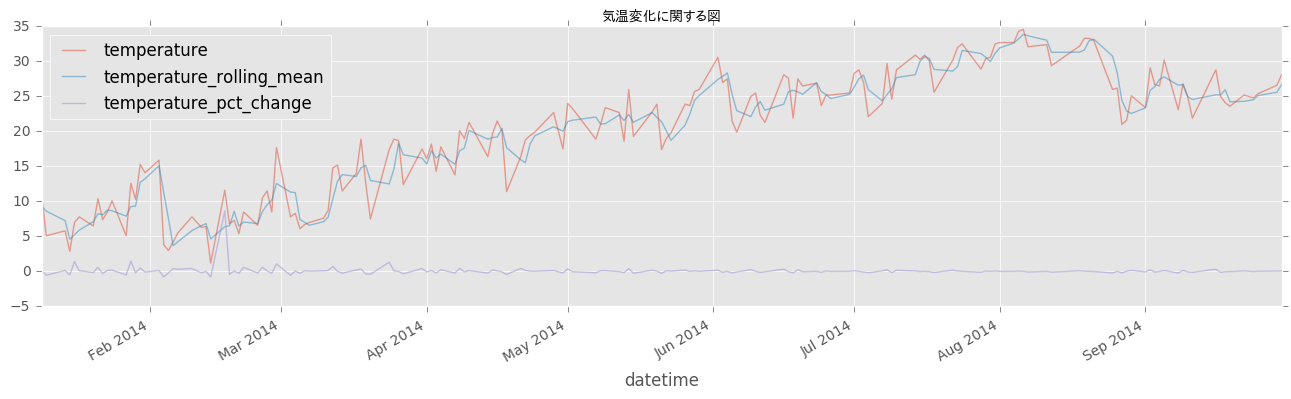

In [52]:
# 少しだけ情報量の多い折れ線グラフ
df.plot(y=['temperature', 'temperature_rolling_mean', 'temperature_pct_change'],  figsize=(16,4), alpha=0.5) # x軸がindexである場合は明記しなくても可
plt.title('気温変化に関する図', fontproperties=font_prop) # fontpropertiesは日本語表示に必要

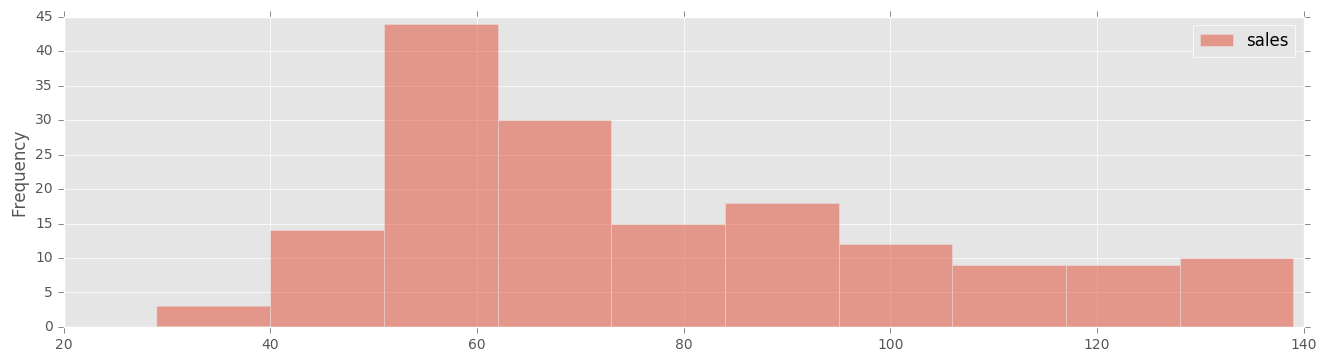

In [53]:
# ヒストグラム
df.plot(kind='hist', y='sales' , bins=10, figsize=(16,4), alpha=0.5)

頻度的には、
- 日別で60個くらい売れている日が多いらしい
- 最大で140個くらい売れている日もあることがわかる　など

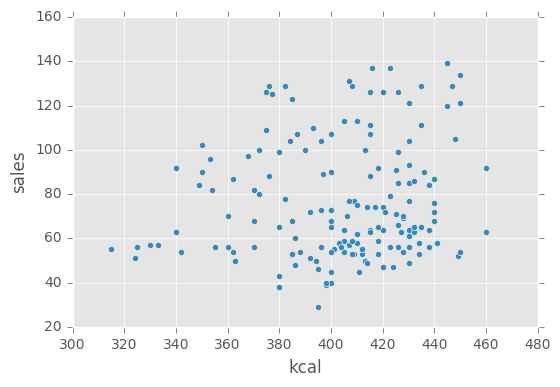

In [54]:
# 散布図
df.plot(kind='scatter', x='kcal', y='sales')

- 「売上個数」と「カロリー」には相関がなさそう　など

In [55]:
# ちなみに相関係数はcorrメソッドで簡単に表示できる
df[['kcal', 'sales']].corr()

,kcal,sales
kcal,1.000000,0.129521
sales,0.129521,1.000000


In [56]:
# ちょっとだけ複雑な集計 例: 月別・期間別の売上個数の状況を可視化したい場合
monthly_df = pd.DataFrame(df.groupby(['month', 'period'])['sales'].sum())
pivot_monthly_df = monthly_df.reset_index().pivot(index='month', columns='period', values='sales')
pivot_monthly_df

period,上旬,中旬,下旬
month,,,
1,216,581,1018
2,725,715,609
3,614,698,369
4,792,344,457
5,316,406,517
6,467,440,311
7,460,277,406
8,288,250,334
9,468,249,234


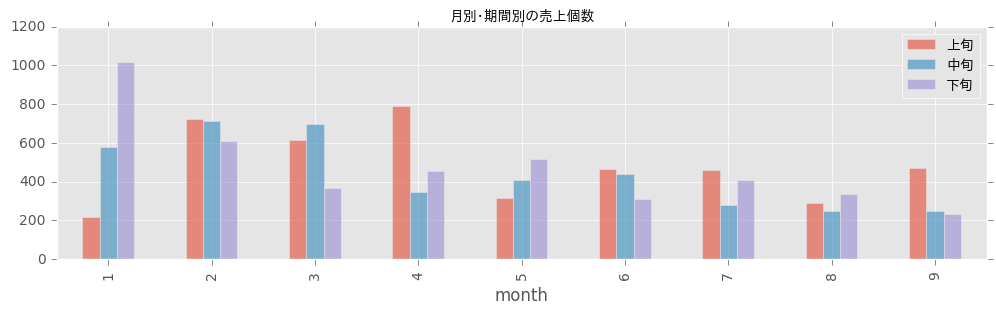

In [57]:
# 棒グラフ
pivot_monthly_df.plot(kind='bar', alpha=0.6, figsize=(12,3)).legend(prop=font_prop) # legend(prop=font_prop)は日本語表示に必要
plt.title('月別・期間別の売上個数', fontproperties=font_prop) # fontpropertiesは日本語表示に必要

- 1月は下旬（20日から31日まで）に売上個数が増える傾向
- 4月だと上旬（1日から10日まで）が売上多い
- 月が進むほど、期間に関係なく売上個数が少なくなっていく傾向　など

## ⑧ 変数の前処理

**dummy化について**
![get_dummies](./figs/get_dummies.PNG)

In [58]:
# 現在のcolumnを確認
print(df.columns)
print(len(df.columns))

Index(['sales', 'week', 'soldout', 'name', 'kcal', 'event', 'payday',
       'weather', 'precipitation', 'temperature', 'month', 'day', 'period',
       'temperature_diff', 'temperature_rolling_mean',
       'temperature_pct_change'],
      dtype='object')
16


In [59]:
# テキストデータが入っている列全てをdummy化する
dummy_df = pd.get_dummies(df, columns=['week', 'name', 'event', 'weather', 'period'])
dummy_df.head()

,sales,soldout,kcal,payday,precipitation,temperature,month,day,temperature_diff,temperature_rolling_mean,...,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雪,weather_雷電,period_上旬,period_中旬,period_下旬
datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-09,129,1,435.0,0.0,0.0,10.9,1,9,1.1,9.333333,...,0,0,1,0,0,0,0,1,0,0
2014-01-10,87,0,440.0,1.0,0.0,5.1,1,10,-5.8,8.600000,...,1,0,0,0,0,0,0,1,0,0
2014-01-14,129,1,376.0,0.0,0.0,5.8,1,14,0.7,7.266667,...,0,1,0,0,0,0,0,0,1,0
2014-01-15,134,0,450.0,0.0,0.0,2.9,1,15,-2.9,4.600000,...,0,0,1,0,0,0,0,0,1,0
2014-01-16,107,0,415.0,0.0,0.0,7.0,1,16,4.1,5.233333,...,1,0,0,0,0,0,0,0,1,0


In [60]:
# jupyter notebookにおいて、pandasで表示が省略されるのを防ぐ
pd.set_option('display.max_columns', 160) # 160番目の列まで全て強制表示

In [61]:
print(dummy_df.shape)
dummy_df.head()

(164, 157)


,sales,soldout,kcal,payday,precipitation,temperature,month,day,temperature_diff,temperature_rolling_mean,temperature_pct_change,week_月,week_木,week_水,week_火,week_金,name_いか天ぷら,name_かじきの甘辛煮,name_きのこソースハンバーグ,name_さわら焼味噌掛け,name_さんま辛味焼,name_たっぷりベーコンフライ,name_ぶりレモンペッパー焼き,name_ますのマスタードソース,name_アジ唐揚げ南蛮ソース,name_エビフライ,name_カレイの唐揚げ,name_カレイ唐揚げ 甘酢あん,name_カレイ唐揚げ夏野菜あん,name_カレイ唐揚げ野菜あんかけ,name_カレイ唐揚げ野菜餡かけ,name_カレイ野菜あんかけ,name_キスと野菜の天ぷら,name_キーマカレー,name_ゴーヤチャンプルー,name_サバ焼味噌掛け,name_サーモンのムニエル2色ソース,name_サーモンフライ・タルタル,name_ジャンボチキンカツ,name_ジューシーメンチカツ,name_タンドリーチキン,name_チキンのコーンクリーム焼き,name_チキンの辛味噌焼き,name_チキンクリームシチュー,name_チキンステーキ・きのこソース,name_チキンフリカッセ,name_チキン南蛮,name_チキン香草焼きマスタードソース,name_チャプチェ,name_チンジャオロース,name_チーズハンバーグ,name_チーズメンチカツ,name_チーズ入りハンバーグ,name_チーズ入りメンチカツ,name_ハンバーグカレーソース,name_ハンバーグケッチャップソース,name_ハンバーグデミソース,name_ハンバーグ和風きのこソース,name_ハンバーグ（デミきのこバター）,name_バーベキューチキン,name_ビーフカレー,name_ビーフシチュー,name_ビーフストロガノフ,name_ビーフトマト煮,name_プルコギ,name_ホタテクリ―ムシチュー,name_ボローニャ風カツ,name_ポークソテー韓国ソース,name_ポークハヤシ,name_ポーク生姜焼き,name_マーボ茄子,name_マーボ豆腐,name_メダイ照り焼,name_メンチカツ,name_ロース甘味噌焼き,name_八宝菜,name_厚切イカフライ,name_厚切ハムカツ,name_名古屋味噌カツ,name_和風ソースハンバーグ,name_和風ハンバーグ,name_回鍋肉,name_手作りひれかつ,name_手作りひれかつとカレー,name_手作りチキンカツ,name_手作りトンカツ,name_手作りロースカツ,name_洋食屋さんのメンチカツ,name_海老クリーミ―クノーデル,name_海老フライとホタテ串カツ,name_海老フライタルタル,name_炊き込みご飯,name_牛すき焼き風,name_牛カルビ焼き肉,name_牛スキヤキ,name_牛丼風煮,name_牛肉すき焼き風,name_牛肉コロッケ,name_牛肉ニンニクの芽炒め,name_牛肉筍煮,name_白身魚のマスタード焼き,name_白身魚の南部焼き,name_白身魚フライ,name_白身魚ムニエル,name_白身魚唐揚げ野菜あんかけ,name_白身魚唐揚げ野菜餡かけ,name_筑前煮,name_肉じゃが,name_肉団子のシチュー,name_肉団子クリームシチュー,name_親子煮,name_豚すき焼き,name_豚の冷しゃぶ,name_豚キムチ炒め,name_豚ロースのピザ風チーズ焼き,name_豚冷シャブ野菜添え,name_豚味噌メンチカツ,name_豚肉と玉子の炒め,name_豚肉と茄子のピリ辛炒め,name_豚肉のマスタード焼き,name_豚肉の生姜焼き,name_豚肉の胡麻シャブ,name_越冬キャベツのメンチカツ,name_酢豚,name_酢豚orカレー,name_青梗菜牛肉炒め,name_青椒肉絲,name_鶏のから揚げねぎ塩炒めソース,name_鶏のから揚げスイートチリソース,name_鶏のカッシュナッツ炒め,name_鶏のトマトシチュー,name_鶏のピリ辛焼き,name_鶏のレモンペッパー焼orカレー,name_鶏の味噌漬け焼き,name_鶏の唐揚げ,name_鶏の唐揚げおろしソース,name_鶏の塩から揚げ,name_鶏の天ぷら,name_鶏の照り焼きマスタード,name_鶏の照り焼きマヨ,name_鶏の親子煮,name_鶏チリソース,name_鶏肉とカシューナッツ炒め,name_鶏肉のカレー唐揚,name_鶏肉の山賊焼き,event_キャリアアップ支援セミナー,event_ママの会,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雪,weather_雷電,period_上旬,period_中旬,period_下旬
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-09,129,1,435.0,0.0,0.0,10.9,1,9,1.1,9.333333,0.112245,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2014-01-10,87,0,440.0,1.0,0.0,5.1,1,10,-5.8,8.600000,-0.532110,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2014-01-14,129,1,376.0,0.0,0.0,5.8,1,14,0.7,7.266667,0.137255,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2014-01-15,134,0,450.0,0.0,0.0,2.9,1,15,-2.9,4.600000,-0.500000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2014-01-16,107,0,415.0,0.0,0.0,7.0,1,16,4.1,5.233333,1.413793,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## ⑨ 最後に、出来たデータをもう一度眺める
欠損値が残っていないかなどを改めて確認し、問題なさそうであれば一旦CSVファイルとして保存しておきます。  
（簡易式ではありますが、）これでひとまずの前処理は完了です！

In [62]:
# 改めて、各列にNaNが入っていないか確認
print(dummy_df.isnull().sum()) 
dummy_df.head()

sales                       0
soldout                     0
kcal                        0
payday                      0
precipitation               0
temperature                 0
month                       0
day                         0
temperature_diff            0
temperature_rolling_mean    0
temperature_pct_change      0
week_月                      0
week_木                      0
week_水                      0
week_火                      0
week_金                      0
name_いか天ぷら                  0
name_かじきの甘辛煮                0
name_きのこソースハンバーグ            0
name_さわら焼味噌掛け               0
name_さんま辛味焼                 0
name_たっぷりベーコンフライ            0
name_ぶりレモンペッパー焼き            0
name_ますのマスタードソース            0
name_アジ唐揚げ南蛮ソース             0
name_エビフライ                  0
name_カレイの唐揚げ                0
name_カレイ唐揚げ 甘酢あん            0
name_カレイ唐揚げ夏野菜あん            0
name_カレイ唐揚げ野菜あんかけ           0
                           ..
name_鶏のから揚げねぎ塩炒めソース         0
name_鶏のから揚げスイートチリソース        0
name_鶏のカッシ

,sales,soldout,kcal,payday,precipitation,temperature,month,day,temperature_diff,temperature_rolling_mean,temperature_pct_change,week_月,week_木,week_水,week_火,week_金,name_いか天ぷら,name_かじきの甘辛煮,name_きのこソースハンバーグ,name_さわら焼味噌掛け,name_さんま辛味焼,name_たっぷりベーコンフライ,name_ぶりレモンペッパー焼き,name_ますのマスタードソース,name_アジ唐揚げ南蛮ソース,name_エビフライ,name_カレイの唐揚げ,name_カレイ唐揚げ 甘酢あん,name_カレイ唐揚げ夏野菜あん,name_カレイ唐揚げ野菜あんかけ,name_カレイ唐揚げ野菜餡かけ,name_カレイ野菜あんかけ,name_キスと野菜の天ぷら,name_キーマカレー,name_ゴーヤチャンプルー,name_サバ焼味噌掛け,name_サーモンのムニエル2色ソース,name_サーモンフライ・タルタル,name_ジャンボチキンカツ,name_ジューシーメンチカツ,name_タンドリーチキン,name_チキンのコーンクリーム焼き,name_チキンの辛味噌焼き,name_チキンクリームシチュー,name_チキンステーキ・きのこソース,name_チキンフリカッセ,name_チキン南蛮,name_チキン香草焼きマスタードソース,name_チャプチェ,name_チンジャオロース,name_チーズハンバーグ,name_チーズメンチカツ,name_チーズ入りハンバーグ,name_チーズ入りメンチカツ,name_ハンバーグカレーソース,name_ハンバーグケッチャップソース,name_ハンバーグデミソース,name_ハンバーグ和風きのこソース,name_ハンバーグ（デミきのこバター）,name_バーベキューチキン,name_ビーフカレー,name_ビーフシチュー,name_ビーフストロガノフ,name_ビーフトマト煮,name_プルコギ,name_ホタテクリ―ムシチュー,name_ボローニャ風カツ,name_ポークソテー韓国ソース,name_ポークハヤシ,name_ポーク生姜焼き,name_マーボ茄子,name_マーボ豆腐,name_メダイ照り焼,name_メンチカツ,name_ロース甘味噌焼き,name_八宝菜,name_厚切イカフライ,name_厚切ハムカツ,name_名古屋味噌カツ,name_和風ソースハンバーグ,name_和風ハンバーグ,name_回鍋肉,name_手作りひれかつ,name_手作りひれかつとカレー,name_手作りチキンカツ,name_手作りトンカツ,name_手作りロースカツ,name_洋食屋さんのメンチカツ,name_海老クリーミ―クノーデル,name_海老フライとホタテ串カツ,name_海老フライタルタル,name_炊き込みご飯,name_牛すき焼き風,name_牛カルビ焼き肉,name_牛スキヤキ,name_牛丼風煮,name_牛肉すき焼き風,name_牛肉コロッケ,name_牛肉ニンニクの芽炒め,name_牛肉筍煮,name_白身魚のマスタード焼き,name_白身魚の南部焼き,name_白身魚フライ,name_白身魚ムニエル,name_白身魚唐揚げ野菜あんかけ,name_白身魚唐揚げ野菜餡かけ,name_筑前煮,name_肉じゃが,name_肉団子のシチュー,name_肉団子クリームシチュー,name_親子煮,name_豚すき焼き,name_豚の冷しゃぶ,name_豚キムチ炒め,name_豚ロースのピザ風チーズ焼き,name_豚冷シャブ野菜添え,name_豚味噌メンチカツ,name_豚肉と玉子の炒め,name_豚肉と茄子のピリ辛炒め,name_豚肉のマスタード焼き,name_豚肉の生姜焼き,name_豚肉の胡麻シャブ,name_越冬キャベツのメンチカツ,name_酢豚,name_酢豚orカレー,name_青梗菜牛肉炒め,name_青椒肉絲,name_鶏のから揚げねぎ塩炒めソース,name_鶏のから揚げスイートチリソース,name_鶏のカッシュナッツ炒め,name_鶏のトマトシチュー,name_鶏のピリ辛焼き,name_鶏のレモンペッパー焼orカレー,name_鶏の味噌漬け焼き,name_鶏の唐揚げ,name_鶏の唐揚げおろしソース,name_鶏の塩から揚げ,name_鶏の天ぷら,name_鶏の照り焼きマスタード,name_鶏の照り焼きマヨ,name_鶏の親子煮,name_鶏チリソース,name_鶏肉とカシューナッツ炒め,name_鶏肉のカレー唐揚,name_鶏肉の山賊焼き,event_キャリアアップ支援セミナー,event_ママの会,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雪,weather_雷電,period_上旬,period_中旬,period_下旬
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-09,129,1,435.0,0.0,0.0,10.9,1,9,1.1,9.333333,0.112245,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2014-01-10,87,0,440.0,1.0,0.0,5.1,1,10,-5.8,8.600000,-0.532110,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2014-01-14,129,1,376.0,0.0,0.0,5.8,1,14,0.7,7.266667,0.137255,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2014-01-15,134,0,450.0,0.0,0.0,2.9,1,15,-2.9,4.600000,-0.500000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2014-01-16,107,0,415.0,0.0,0.0,7.0,1,16,4.1,5.233333,1.413793,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [63]:
# 出来たデータをutf-8で保存する
dummy_df.to_csv('./data/processed_datamart.csv', encoding='utf-8')

## きれいになったデータはこの後どう活用するのか？

例えば、'sales'を「目的変数」、それ以外の列を「説明変数」として、目的変数を予測する"モデル"を作成する などがよく行われる。


![modeling](./figs/modeling.PNG)


より目的変数に"効く"説明変数を作ることを**特徴量エンジニアリング**という  
pandasを使った前処理とは、NaNや無関係な説明変数を削除しつつ、"効く"特徴量を探す（作成する）作業のこと

地味だが、モデルの精度を上げるうえでは非常に大切な作業！！！データ分析のほとんどの時間はここに使われる。

## ここでは取り上げられなかったけど、よく分析で使うその他のPandas関数

- df.where()　←df.mask()と反対の条件を対象にする。内容的には同じ処理。
- df.merge()
- df.concat()
- df.melt() ← df.pivot()の逆操作をするもの

などなど、他にも便利でマニアックなメソッドがたくさんあります。

## 参考リンク（もうちょっといろいろ知りたい人用）
**基本操作系**
- [Pandas Cheet Sheet - GitHub](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
    - 基本操作について1ページでまとめてくれているCheet Sheet
    
- [StatsFragments by @sinhrks](http://sinhrks.hatenablog.com/)
    - 各種Pandasメソッドを図付きで詳細に解説してくれています。非常に参考になる。
    
**集計テクニック系**
- [pandasで条件分岐(case when的な)によるデータ加工を網羅したい](https://qiita.com/Hyperion13fleet/items/98c31744e66ac1fc1e9f)
    - SQLのcase whenのような条件分岐の処理をpandasでやりたいときが良くありますがなかなか難しい。そんなときのお助け記事。
    
**作図系**
- [PythonでPandasのPlot機能を使えばデータ加工からグラフ作成までマジでシームレス - Qiita](https://qiita.com/hik0107/items/de5785f680096df93efa)
    - Pandas Plotでできることの概要がわかります
- [pythonで美しいグラフ描画 -seabornを使えばデータ分析と可視化が捗る その1 - Qiita](https://qiita.com/hik0107/items/3dc541158fceb3156ee0)
    - Pandas Plot, matplotlibと比較して簡単に美しいプロットがかけるmatplotのラッパーseabornの概要がわかります 